# Spotify Analysis and EDA

In [1]:
import spotipy
import os
from spotipy.oauth2 import SpotifyOAuth,SpotifyClientCredentials

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep

In [2]:
# load in csv
new_tracks = pd.read_csv('../data/new_tracks.csv')
new_tracks.head()

,artist_uri,artist,track_uri,track_name
0,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Chris Brown,spotify:track:1Jz1yhcPm1Yt6aoed3zact,"Go Crazy (Remix) (feat. Young Thug, Future, Li..."
1,spotify:artist:64KEffDW9EtZ1y2vBYgq8T,Marshmello,spotify:track:2aLaWfLeSzWrTLdLeVQ6zQ,Lavandia
2,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:5UMMPHPp6vRP6ghPpSUOzp,CLOUDS
3,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:3K8WGcz1AB6MvSlRypACC8,CLOUDS (Edit)
4,spotify:artist:3tlXnStJ1fFhdScmQeLpuG,Brent Faiyaz,spotify:track:61gjdUMePfAOD5p0gnGvfv,Eden (From “Black History Always / Music For t...


In [3]:
# create track_url column
new_tracks['track_url'] = new_tracks['track_uri'].replace('spotify:track:', 
                                                          'https://open.spotify.com/track/', 
                                                          regex = True).astype(str)
new_tracks.head()

,artist_uri,artist,track_uri,track_name,track_url
0,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Chris Brown,spotify:track:1Jz1yhcPm1Yt6aoed3zact,"Go Crazy (Remix) (feat. Young Thug, Future, Li...",https://open.spotify.com/track/1Jz1yhcPm1Yt6ao...
1,spotify:artist:64KEffDW9EtZ1y2vBYgq8T,Marshmello,spotify:track:2aLaWfLeSzWrTLdLeVQ6zQ,Lavandia,https://open.spotify.com/track/2aLaWfLeSzWrTLd...
2,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:5UMMPHPp6vRP6ghPpSUOzp,CLOUDS,https://open.spotify.com/track/5UMMPHPp6vRP6gh...
3,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:3K8WGcz1AB6MvSlRypACC8,CLOUDS (Edit),https://open.spotify.com/track/3K8WGcz1AB6MvSl...
4,spotify:artist:3tlXnStJ1fFhdScmQeLpuG,Brent Faiyaz,spotify:track:61gjdUMePfAOD5p0gnGvfv,Eden (From “Black History Always / Music For t...,https://open.spotify.com/track/61gjdUMePfAOD5p...


In [4]:
# setup spotify with app credentials, use environment variables so GitHub scrapers don't get access to my spotify developer keys
cid = os.getenv('SPOTIPY_CLIENT_ID')
secret = os.getenv('SPOTIPY_CLIENT_SECRET')

#https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

client_credentials_manager = SpotifyClientCredentials(client_id = cid, 
                                                      client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [5]:
# get artist popularity
sp.artist(new_tracks.iloc[0]['artist_uri'])['popularity']

91

In [6]:
# create artist popularity column
popularity_list = []
for i in tqdm(range(len(new_tracks))):
     popularity_list.append(sp.artist(new_tracks.iloc[i]['artist_uri'])['popularity'])
     sleep(0.067)
new_tracks['popularity'] = popularity_list
new_tracks.head()

100%|██████████| 13610/13610 [25:26<00:00,  8.92it/s]


,artist_uri,artist,track_uri,track_name,track_url,popularity
0,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Chris Brown,spotify:track:1Jz1yhcPm1Yt6aoed3zact,"Go Crazy (Remix) (feat. Young Thug, Future, Li...",https://open.spotify.com/track/1Jz1yhcPm1Yt6ao...,91
1,spotify:artist:64KEffDW9EtZ1y2vBYgq8T,Marshmello,spotify:track:2aLaWfLeSzWrTLdLeVQ6zQ,Lavandia,https://open.spotify.com/track/2aLaWfLeSzWrTLd...,90
2,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:5UMMPHPp6vRP6ghPpSUOzp,CLOUDS,https://open.spotify.com/track/5UMMPHPp6vRP6gh...,86
3,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:3K8WGcz1AB6MvSlRypACC8,CLOUDS (Edit),https://open.spotify.com/track/3K8WGcz1AB6MvSl...,86
4,spotify:artist:3tlXnStJ1fFhdScmQeLpuG,Brent Faiyaz,spotify:track:61gjdUMePfAOD5p0gnGvfv,Eden (From “Black History Always / Music For t...,https://open.spotify.com/track/61gjdUMePfAOD5p...,84


In [7]:
# save popularity score to csv
new_tracks.to_csv('../data/tracks_with_popularity.csv', index = False)

In [8]:
# load in new csv
new_tracks = pd.read_csv('../data/tracks_with_popularity.csv')
new_tracks.head()

,artist_uri,artist,track_uri,track_name,track_url,popularity
0,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Chris Brown,spotify:track:1Jz1yhcPm1Yt6aoed3zact,"Go Crazy (Remix) (feat. Young Thug, Future, Li...",https://open.spotify.com/track/1Jz1yhcPm1Yt6ao...,91
1,spotify:artist:64KEffDW9EtZ1y2vBYgq8T,Marshmello,spotify:track:2aLaWfLeSzWrTLdLeVQ6zQ,Lavandia,https://open.spotify.com/track/2aLaWfLeSzWrTLd...,90
2,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:5UMMPHPp6vRP6ghPpSUOzp,CLOUDS,https://open.spotify.com/track/5UMMPHPp6vRP6gh...,86
3,spotify:artist:6fOMl44jA4Sp5b9PpYCkzz,NF,spotify:track:3K8WGcz1AB6MvSlRypACC8,CLOUDS (Edit),https://open.spotify.com/track/3K8WGcz1AB6MvSl...,86
4,spotify:artist:3tlXnStJ1fFhdScmQeLpuG,Brent Faiyaz,spotify:track:61gjdUMePfAOD5p0gnGvfv,Eden (From “Black History Always / Music For t...,https://open.spotify.com/track/61gjdUMePfAOD5p...,84


In [9]:
new_tracks.shape

(13610, 6)

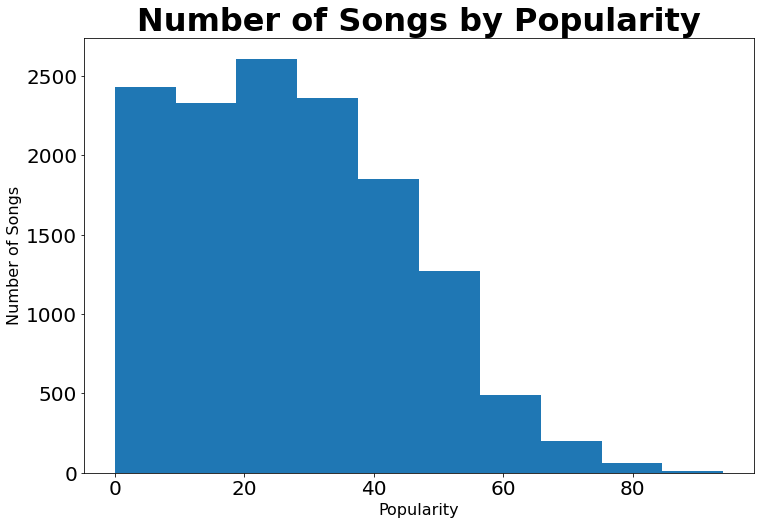

In [10]:
# check the distrubution of popularity
plt.figure(figsize = (12, 8))
plt.hist(new_tracks['popularity'])
plt.xlabel('Popularity', fontsize = 16)
plt.ylabel('Number of Songs', fontsize = 16)
plt.title('Number of Songs by Popularity', fontweight = 'bold', fontsize = 32)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('/home/jesse/dsir-1116/projects/capstone/images/popularity.png');

Here we see that it is quite tough to get popularity on Spotify with most artists having a popularity less than 60. 

In [11]:
# test out what spotipy audio_features returns 
audio_analysis = sp.audio_features(new_tracks.iloc[0]['track_url'])
audio_analysis

[{'danceability': 0.721,
  'energy': 0.565,
  'key': 0,
  'loudness': -9.157,
  'mode': 0,
  'speechiness': 0.28,
  'acousticness': 0.248,
  'instrumentalness': 0,
  'liveness': 0.284,
  'valence': 0.597,
  'tempo': 93.8,
  'type': 'audio_features',
  'id': '1Jz1yhcPm1Yt6aoed3zact',
  'uri': 'spotify:track:1Jz1yhcPm1Yt6aoed3zact',
  'track_href': 'https://api.spotify.com/v1/tracks/1Jz1yhcPm1Yt6aoed3zact',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1Jz1yhcPm1Yt6aoed3zact',
  'duration_ms': 227234,
  'time_signature': 4}]

In [12]:
# set up Savify
# logger = Logger(log_location='/media/jesse/Number1/logs', log_level=None)
# s = Savify(api_credentials=(cid, secret), 
#            quality=Quality.BEST, 
#            download_format=Format.WAV, 
#            path_holder=PathHolder(downloads_path='/media/jesse/Number2/tracks'), 
#            logger = logger,
#            skip_cover_art = True)

In [14]:
os.chdir('/media/jesse/Number2/tracks')
!spotdl 'https://open.spotify.com/track/3ig7SLurMJy1Z8l2bj9yZH' 

Fetching Song...                                                                
Searching for: The Kid LAROI - Without You - Boy Dunno Remix
100%|█████████████████████████████████████████████████████|ETA: 00:00, ~min/song


In [15]:
# create list of spotify tracks
tracks_list = [i for i in new_tracks['track_url']]
tracks_list

# create string from list to pass into spotdl
track_string = ' '.join('"{0}"'.format(w) for w in tracks_list)
track_string

'"https://open.spotify.com/track/3ig7SLurMJy1Z8l2bj9yZH" "https://open.spotify.com/track/7EqKpYaxDbPrzSCIdAAUDF" "https://open.spotify.com/track/1A8990rtwHQ417l3yADe5t" "https://open.spotify.com/track/0vyPhRSQZuNc9VZpb1FZeU" "https://open.spotify.com/track/3q3lSbfT5BnQlIvGwahgAD" "https://open.spotify.com/track/6B7jm2IJsh3DYXO7RgwVnx" "https://open.spotify.com/track/4x68ANg3fJgpzEqvNSCvWh" "https://open.spotify.com/track/5M9aURB8w1hD13HZhdBSUB" "https://open.spotify.com/track/0tQmgwFKw9069z1BXniOiA" "https://open.spotify.com/track/2AceGjiX9isUbXmMZa0Dl1" "https://open.spotify.com/track/0WBzEhw1dk6OeGQwsxWRa5" "https://open.spotify.com/track/4qogq65KKQhTrs7N7iTjg8" "https://open.spotify.com/track/2UJsKjM595pEyWUcd8JEIR" "https://open.spotify.com/track/0EJcJV9LnoiiFQD7oVhSwA" "https://open.spotify.com/track/2Uj2AHraTnIoIoNCHcHVEC" "https://open.spotify.com/track/3Kq9aL23BItUwtivLHypoy" "https://open.spotify.com/track/4Fk8SJtl3UAtk22oLAVdDz" "https://open.spotify.com/track/7cSK36g7Jb27r9U

In [16]:
os.chdir('/media/jesse/Number2/tracks')
for i in tqdm(range(len(tracks_list))):
    track_string = tracks_list[i]
    !spotdl {track_string} >> /media/jesse/Number1/logs/spotify.log 2>&1
    sleep(5)

100%|██████████| 12869/12869 [23:15:35<00:00,  6.51s/it]  
